# 1. Simple NumPy function

As a warmup exercise, print the five dimensional identity matrix.

In [161]:
%xmode plain

import numpy as np

np.eye(5)

Exception reporting mode: Plain


array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])

Note that [numpy.identity()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.identity.html) could also be used but appears to offer [no real advantage](https://stackoverflow.com/questions/28363447/what-are-the-advantages-of-using-numpy-identity-over-numpy-eye).

# 2. Linear regression with one variable

Consider a company which operates food trucks in multiple cities, and wishes to determine which new city to open a food truck in. The profit of the food truck can be (simplistically) predicted by the population of the city the truck operates in. We have a two dimensional dataset with one independent variable (Population) and one dependent variable (Profit).

In [185]:
import pandas as pd

data1 = pd.read_csv('ex1data1.txt', header=None, names=['Population', 'Profit'])
display(data1.info())
data1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
Population    97 non-null float64
Profit        97 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB


None

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


## 2.1 Plotting the data

Plotting the profit of a food truck against the population of the city it operates in shows what appears to be a linear relationship.

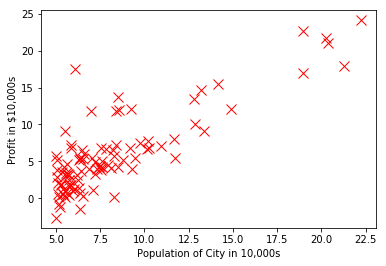

In [186]:
%matplotlib inline

from matplotlib import pyplot as plt

plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.plot(data1['Population'], data1['Profit'], 'rx', markersize=10);

## 2.2 Gradient descent

We will use a linear model of the form $h_{\theta}(x) = \theta_0 + \theta_1 x_1$ to predict food truck profits.

### 2.2.1 Update equations

Define the cost function, making use of the `@` operator for the dot product ([new in Python 3.5](https://docs.python.org/3/whatsnew/3.5.html#whatsnew-pep-465)).

$J(\theta) = \frac{1}{2m} \sum\limits_{i=0}^{m} (h_{\theta}(x^{i}) - y^{i})^2$

In [187]:
def compute_cost(X, y, theta):
    return (1 / (2 * m)) * ((X @ theta - y) ** 2).sum()

### 2.2.2 Implementation

We want our parameters represented as a column vector, which necessitates using a two-dimensional ndarray since a one-dimensional array cannot reliably be interpreted as either a row or a column vector.

In [188]:
theta = np.zeros(2).reshape(-1, 1)
theta

array([[ 0.],
       [ 0.]])

Note that we prepend a column of ones to the array of feature vectors to account for the bias term in the model.

In [190]:
m = len(data)
X = np.stack([np.ones(m), data1['Population']], axis=1)
y = data1['Profit'].values.reshape(-1, 1) # Want a column vector, not a row vector
display(X.shape)
display(y.shape)

(97, 2)

(97, 1)

### 2.2.3 Computing the cost $J(\theta)$

Test the cost function and initial parameter vector.

In [191]:
compute_cost(X, y, theta)

32.072733877455676

### 2.2.4 Gradient descent

Implement the gradient descent algorithm to obtain the fitted parameter vector. This is done by repeatedly subtracting the gradient of the cost function, multiplied by the learning rate $\alpha$, from the parameter vector:

$\theta_{j} = \theta_{j} - \alpha \frac{1}{m} \sum\limits_{i=0}^{m} (h_{\theta}(x^{i}) - y^{i}) x_{j}^{i}$

In [192]:
def gradient_descent(X, y, theta, alpha, iterations):
    J_history = np.zeros(iterations)
    for i in range(iterations):
        theta = theta - alpha * (1 / m) * ((X @ theta - y) * X).sum(axis=0).reshape(-1, 1);
        J_history[i] = compute_cost(X, y, theta);
    return theta, J_history

iterations = 1500
alpha = 0.01
theta = np.zeros(2).reshape(-1, 1) # Re-initialize theta to default values
theta, J_history = gradient_descent(X, y, theta, alpha, iterations)
theta

array([[-3.63029144],
       [ 1.16636235]])

Plot the value of the cost function relative to the number of iterations.

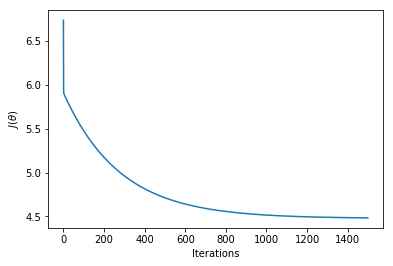

In [168]:
plt.xlabel('Iterations')
plt.ylabel(r'$J(\theta)$')
plt.plot(J_history);

Now plot the fitted model.

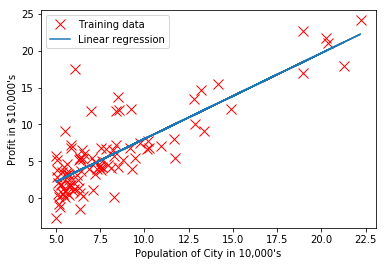

In [193]:
plt.ylabel("Profit in $10,000's")
plt.xlabel("Population of City in 10,000's")
plt.plot(data1['Population'], data1['Profit'], 'rx', markersize=10)
plt.plot(X[:, 1], X @ theta)
plt.legend(['Training data', 'Linear regression']);

Make a couple of predictions using our model, multiplying by 10,000 to give an answer in dollars.

In [194]:
format((np.array([1, 3.5]) @ theta * 10000)[0], ',.0f')

'4,520'

In [195]:
format((np.array([1, 7]) @ theta * 10000)[0], ',.0f')

'45,342'

## 2.3 Debugging

Nothing to do here.

## 2.4 Visualizing $J(\theta)$

Compute the value of the cost function of a range of parameter values.

In [196]:
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)
J_vals = np.zeros(len(theta0_vals) * len(theta1_vals)).reshape(len(theta0_vals), len(theta1_vals))

for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = np.array([theta0_vals[i], theta1_vals[j]]).reshape(-1, 1)
        J_vals[i, j] = compute_cost(X, y, t)
        
J_vals

array([[ 328.09290555,  316.6648683 ,  305.44447299, ...,  186.35412584,
         195.06735595,  203.98822799],
       [ 323.26504192,  311.92025945,  300.7831189 , ...,  189.60197489,
         198.39845977,  207.40258658],
       [ 318.47799046,  307.21646275,  296.16257698, ...,  192.89063611,
         201.77037576,  210.85775734],
       ..., 
       [  49.81156018,   46.45923561,   43.31455298, ...,  691.41691065,
         708.20585345,  725.20243817],
       [  48.94247627,   45.67340647,   42.61197861, ...,  698.62353943,
         715.49573699,  732.57557648],
       [  48.11420452,   44.9283895 ,   41.95021641, ...,  705.87098036,
         722.82643269,  739.98952696]])

Make a surface plot of the cost function. J_vals needs to be transposed for reasons I don't fully understand.

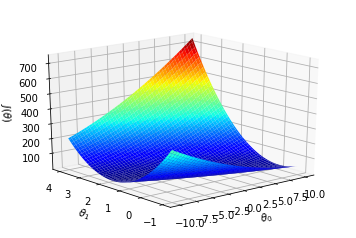

In [106]:
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel(r'$\theta_{0}$')
ax.set_ylabel(r'$\theta_{1}$')
ax.set_zlabel(r'$J(\theta)$')
ax.view_init(20, 230)

t0, t1 = np.meshgrid(theta0_vals, theta1_vals)
ax.plot_surface(t0, t1, J_vals.T, cmap='jet');

Contour plot of the cost function and fitted parameter values at the minimum of the cost function.

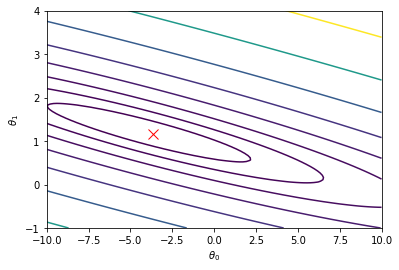

In [108]:
plt.xlabel(r'$\theta_{0}$')
plt.ylabel(r'$\theta_{1}$')
plt.plot(theta[0][0], theta[1][0], 'rx', markersize=10)
plt.contour(t0, t1, J_vals.T, np.logspace(-2, 3, 20));

# 3. Linear regression with multiple variables

For this part of the exercise we will use dataset of home sales. Each row of the dataset consists of the size in square feet, the number of bedrooms, and the selling price.

In [197]:
data2 = pd.read_csv('ex1data2.txt', header=None, names=['Size', 'Bedrooms', 'Price'])
display(data2.info())
data2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
Size        47 non-null int64
Bedrooms    47 non-null int64
Price       47 non-null int64
dtypes: int64(3)
memory usage: 1.2 KB


None

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


## 3.1 Feature normalization

In order to make sure that the range of each feature value is roughly the same, we normalize the features to have a mean of zero and a standard deviation of one.

In [274]:
X = data2[['Size', 'Bedrooms']]
y = data2['Price'].values.reshape(-1, 1)

mu = X.mean()
sigma = X.std()

X = (X - mu) / sigma

X['Bias'] = 1
X = X[['Bias', 'Size', 'Bedrooms']].values

## 3.2 Gradient descent

Note that the cost function as originally implemented can handle linear regression for multiple variables.

array([[ 334302.06399328],
       [ 100087.11600585],
       [   3673.54845093]])

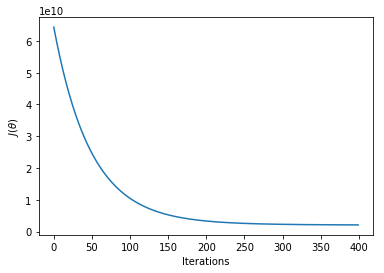

In [275]:
iterations = 400
alpha = 0.01
theta = np.zeros(3).reshape(-1, 1)

# Run gradient descent
theta, J_history = gradient_descent(X, y, theta, alpha, iterations)

# Plot cost function
plt.xlabel('Iterations')
plt.ylabel(r'$J(\theta)$')
plt.plot(J_history)

# Display fitted parameters
theta

Predict the price of a 1650 square foot, 3 bedroom home.

In [270]:
test = np.array([1650, 3])
test = (test - mu) / sigma
test['Bias'] = 1
test = test[['Bias', 'Size', 'Bedrooms']]
format((test @ theta)[0], ',.0f')

'289,315'

### 3.2.1 Selecting learning rates

We'll try out a variety of learning rates and plot the convergence of the cost function. This plot shows that the largest learning rate (1) leads to the most rapid convergence.

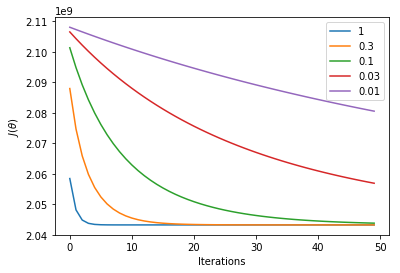

In [276]:
learning_rates = [1, .3, .1, .03, .01]
iterations = 50

plt.xlabel('Iterations')
plt.ylabel(r'$J(\theta)$')

for alpha in learning_rates:
    _, J_history = gradient_descent(X, y, theta, alpha, iterations)
    plt.plot(J_history, label=alpha)

plt.legend();

However, a learning rate of 3 causes the cost function to diverge.

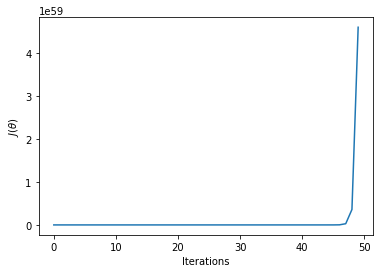

In [279]:
alpha = 3
_, J_history = gradient_descent(X, y, theta, alpha, iterations)

plt.xlabel('Iterations')
plt.ylabel(r'$J(\theta)$')
plt.plot(J_history);

## 3.3 Normal equations

Linear regression does have a closed-form solution which is feasible so long as the feature matrix is invertible. When using this method we do not need to normalize the features, although we still add the bias term.

In [271]:
from numpy.linalg import inv

X = data2[['Size', 'Bedrooms']]
X['Bias'] = 1
X = X[['Bias', 'Size', 'Bedrooms']].values

theta = inv(X.T @ X) @ X.T @ y
theta

array([[ 89597.9095428 ],
       [   139.21067402],
       [ -8738.01911233]])

We can compare the prediction using these parameters to the prediction from gradient descent (289,315). It's pretty close.

In [273]:
test = np.array([1, 1650, 3])
format((test @ theta)[0], ',.0f')

'293,081'